In [1]:
import numpy as np
import sys
sys.path.append("../utils/")
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2 as cv

In [2]:
grouped_classes = [[77,73],[11,12],[13],[17,18,20,21],\
       [19,23,24,25,28,29,60,61,65,26],[41,42,50,40,44,45,47,49]]

labels = ["building and facility","small aircraft",
          "large aircraft","vehicles","bus","boat"]
#Loading our labels
coords1, chips1, classes1 = wv.get_labels('/data/zjc4//xView_train.geojson')

100%|██████████| 601937/601937 [00:03<00:00, 153463.93it/s]


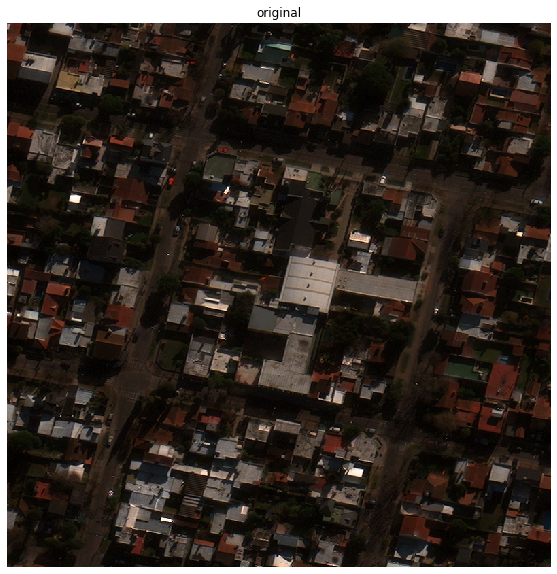

2


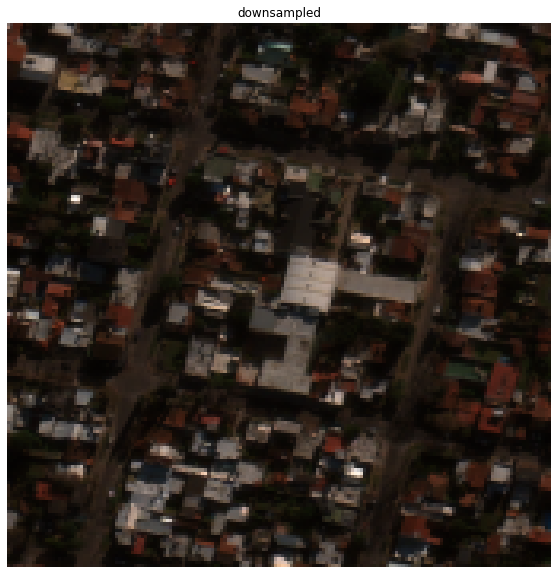

In [3]:
def downsampleImage(img,res_native=30,res_out=140):
    kernel_sz = int(0.5*(res_out/res_native))
    scale_percent = res_native/res_out
    width = int(img.shape[1] * scale_percent )
    height = int(img.shape[0] * scale_percent)
    dim = (width, height)
    print(kernel_sz)
    sigma = 0.3*((kernel_sz-1)*0.5 - 1) + 0.8
    blur = cv.blur(img,(kernel_sz,kernel_sz),borderType=cv.BORDER_REFLECT)
    resized = cv.resize(blur, dim, interpolation = cv.INTER_AREA)
    return resized

def getRandomImageClass(s_class=[11,12],image_path = "/data/zjc4/train_images/"):
    mask = (np.isin(classes1,s_class))
    schips = chips1[mask]
    chip_name = (np.random.choice(schips))
    arr = wv.get_image(image_path+chip_name)
    coords = coords1[(chips1==chip_name) & (mask)]
    classes = classes1[(chips1==chip_name) & (mask)].astype(np.int64)
    c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords,
                                        classes=classes, shape=(800,800))
    return chip_name,c_img[0]

_, img = getRandomImageClass()

plt.figure(figsize=(10,10))
plt.title("original")
plt.imshow(img)
plt.axis('off')
plt.show()

dimg = downsampleImage(img)
plt.figure(figsize=(10,10))
plt.title("downsampled")
plt.imshow(dimg)
plt.axis('off')
plt.show()
